# Naive Bayes
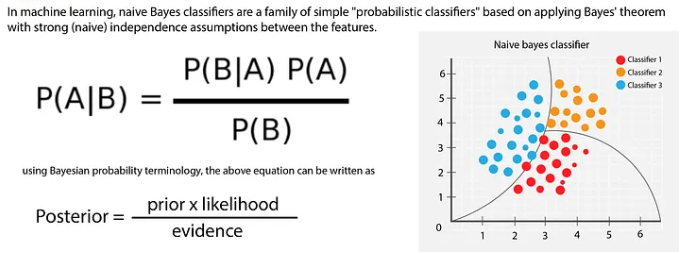

- The Naïve Bayes Classifier belongs to the family of probability classifier, using Bayesian theorem. 
- The reason why it is called ‘Naïve’ because it requires rigid independence assumption between input variables. Therefore, it is more proper to call Simple Bayes or Independence Bayes. 
- Simple though it is, Naïve Bayes Classifier remains one of popular methods to solve text categorization problem, the problem of judging documents as belonging to one category or the other, such as email spam detection.

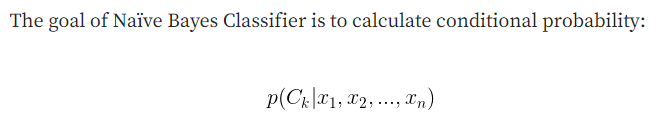
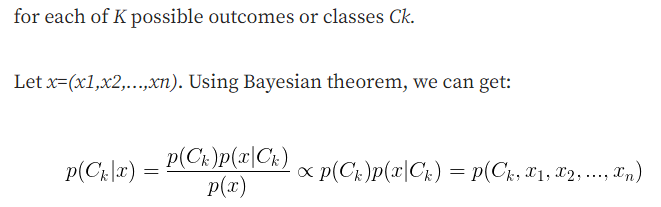

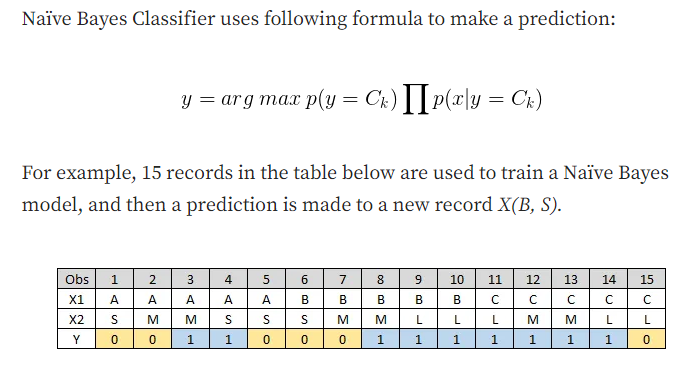

In [1]:
# Create data 

import numpy as np
import pandas as pd

data=[['A','S',0],
      ['A','M',0],
      ['A','M',1],
      ['A','S',1],
      ['A','S',0],
      ['B','S',0],
      ['B','M',0],
      ['B','M',1],
      ['B','L',1],
      ['B','L',1],
      ['C','L',1],
      ['C','M',1],
      ['C','M',1],
      ['C','L',1],
      ['C','L',0]
      ]
data = pd.DataFrame(data,columns=['x1','x2','y'])

In [2]:
# Train Naive Bayes Model

def Naive_Bayes(data):
    # Step 1: Calculate Prior Probability
    y_unique = data.y.unique()
    prior_probability = np.zeros(len(data.y.unique()))
    for i in range(0,len(y_unique)):
        prior_probability[i]=sum(data['y']==y_unique[i])/len(data['y'])
    
    # Step 2: Calculate Conditional Probability
    conditional_probability = {}
    for i in range(1,data.shape[1]):
        x_unique = list(set(data['x'+str(i)]))
        x_conditional_probability = np.zeros((len(data.y.unique()),len(set(data['x'+str(i)]))))
        for j in range(0,len(y_unique)):
            for k in range(0,len(x_unique)):
                x_conditional_probability[j,k]=data.loc[(data['x'+str(i)]==x_unique[k])&(data['y']==y_unique[j]),].shape[0]/sum(data['y']==y_unique[j])
    
        x_conditional_probability = pd.DataFrame(x_conditional_probability,columns=x_unique,index=y_unique)   
        conditional_probability['x'+str(i)] = x_conditional_probability       
    
    return prior_probability,conditional_probability
    
prior_probability,conditional_probability = Naive_Bayes(data)

In [3]:
# Prediction

def prediction(X):
    x1=X[0];x2=X[1]
    p0=prior_probability[0]*conditional_probability['x1'][x1][0]*conditional_probability['x2'][x2][0]
    p1=prior_probability[1]*conditional_probability['x1'][x1][1]*conditional_probability['x2'][x2][1]
    
    if p0>p1:
        y_pred=0
    else:
        y_pred=1
    
    return y_pred
    
prediction(['B','S'])

0

## Note: Naive Bayes requires a strong assumption of independent predictors, so when the model has a bad performance, the reason leading to that may be the dependence between predictors.